In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df= pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.shape


(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df['bmi'].describe()


count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)


In [ ]:
df.isnull().sum()



id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.drop('id',axis=1,inplace=True)
df

KeyError: ignored

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


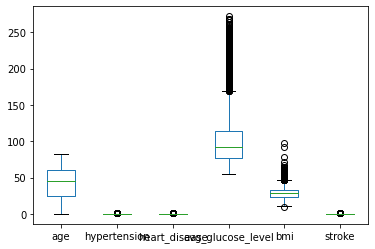

In [ ]:
df.plot(kind='box')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [ ]:
enc.fit_transform(df['gender','smoking_status'])

KeyError: ignored

In [ ]:
gender=enc.fit_transform(df['gender'])


In [ ]:
ever_married=enc.fit_transform(df['ever_married'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
smoking_status=enc.fit_transform(df['smoking_status'])


In [ ]:
df['gender']=gender
df['ever_married']=ever_married
df['work_type']=work_type
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status



In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
X=df.drop('stroke',axis=1)
Y=df['stroke']


In [ ]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [ ]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.25,random_state=3)

In [ ]:
X_train.shape

(3832, 10)

In [ ]:
X_test.shape

(1278, 10)

In [36]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [39]:
X_train_norm=std.fit_transform(X_train)
X_test_norm=std.transform(X_test)

In [40]:
X_train_norm

array([[ 1.19837894,  0.84227188, -0.32249746, ...,  0.40465971,
         0.5797526 ,  0.58553764],
       [-0.832664  , -1.6754133 , -0.32249746, ..., -0.6673959 ,
        -1.1437292 , -1.27112784],
       [-0.832664  , -0.61533533, -0.32249746, ..., -0.75245155,
         0.65692343, -0.3427951 ],
       ...,
       [-0.832664  , -0.12946626, -0.32249746, ...,  1.8935766 ,
        -0.12764665,  1.51387037],
       [ 1.19837894, -1.81322344, -0.32249746, ..., -0.5442424 ,
        -1.9797465 , -1.27112784],
       [-0.832664  , -0.48282559, -0.32249746, ..., -0.55797534,
         2.04599832,  0.58553764]])

In [41]:
X_test_norm

array([[-0.832664  , -0.61533533, -0.32249746, ...,  0.24340837,
        -0.70642785,  0.58553764],
       [ 1.19837894,  0.66559221, -0.32249746, ..., -0.08928327,
         0.72123245,  0.58553764],
       [-0.832664  , -0.26197601, -0.32249746, ...,  1.26186119,
         1.35146087,  0.58553764],
       ...,
       [-0.832664  , -0.83618491, -0.32249746, ..., -0.80339634,
         0.09100403,  0.58553764],
       [ 1.19837894, -0.792015  , -0.32249746, ..., -0.50193607,
         0.33537832, -1.27112784],
       [-0.832664  ,  1.72567018, -0.32249746, ..., -0.47779267,
        -0.41060635, -1.27112784]])

***SVM***

In [70]:
from sklearn.svm import SVC
sv=SVC()


In [71]:
sv.fit(X_train_norm,Y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
Y_pred=sv.predict(X_test_norm)


In [74]:
from sklearn.metrics import accuracy_score


In [75]:
sv_accu=accuracy_score(Y_test,Y_pred)


In [76]:
sv_accu

0.9530516431924883

Decision **Tree**

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [78]:
dt.fit(X_train_norm,Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [79]:
Y_pred=dt.predict(X_test_norm)


In [81]:
dt_accu=accuracy_score(Y_test,Y_pred)


In [82]:
dt_accu

0.9021909233176839

Logistic **Regression**

In [83]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [84]:
lr.fit(X_train_norm,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
Y_pred=lr.predict(X_test_norm)


In [102]:
lr_accu=accuracy_score(Y_test,Y_pred)


In [103]:
lr_accu

0.9499217527386542

**KNN**

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()


In [90]:
knn.fit(X_train_norm,Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [91]:
Y_pred=knn.predict(X_test_norm)


In [104]:
knn_accu=accuracy_score(Y_test,Y_pred)


In [105]:
knn_accu

0.9499217527386542

Random **Forest**

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()


In [95]:
rf.fit(X_train_norm,Y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
Y_pred=rf.predict(X_test_norm)


In [106]:
rf_accu=accuracy_score(Y_test,Y_pred)


In [107]:
rf_accu

0.9499217527386542

**Bar Graph to compare the accuracy of algorithms**

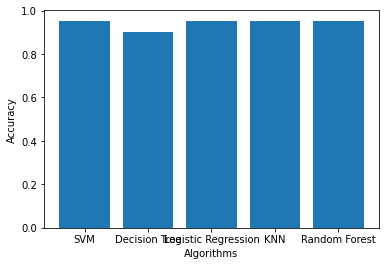

In [108]:
plt.bar(['SVM','Decision Tree','Logistic Regression','KNN','Random Forest'],[sv_accu,dt_accu,lr_accu,knn_accu,rf_accu])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()
